# 데이터 이상값 처리 기법

## 1. 필요 라이브러리 import

In [11]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sns

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else : 
    foont_family = "AppleGothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

## 2. Z검정(Z-Test)을 이용한 이상값 처리

In [12]:
# 1) 데이터 생성

# 3000개의 랜덤 데이터 생성
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

In [13]:
data[0:2]

[58, 40]

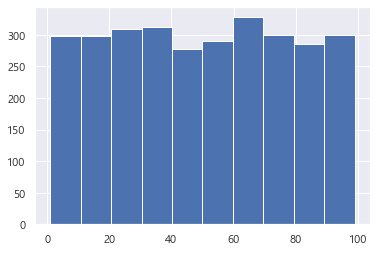

In [14]:
# 히스토그램으로 생성된 ㄷ이터 분포 확인
plt.hist(data)
plt.show()

49.97
28.439803679584944


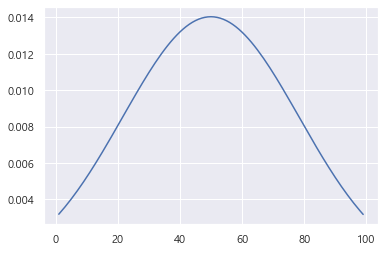

In [18]:
# Data의 정규분포 확인
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

# 확률 밀도 함수 생성
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

3.434289889507151e-17
1.0


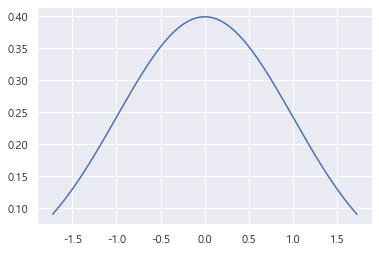

In [21]:
# 표준정규분포(Z분포)로 변환
std_list = []

for i in data:
    z= (i-data_mean) / data_std
    std_list.append(z)
    
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

50.06710963455149
28.582784377001012


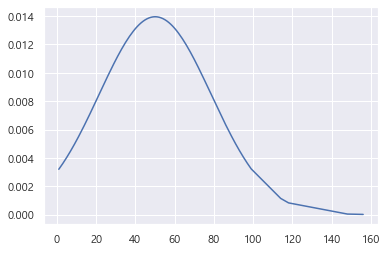

In [26]:
# 2) 데이터셋에 이상값 추가

# 이상값 추가
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)

ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

8.852276608306896e-17
1.0


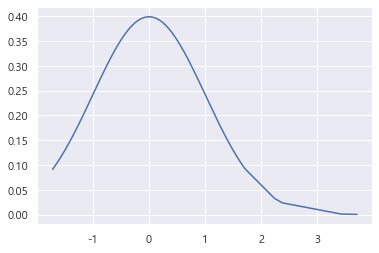

In [31]:
# 이상값 추가된 데이터의 표준화
ol_std_list = []
for i in ol_data:
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [34]:
# 3) Z값의 2가 넘어 가는 데이터 삭제

# 전체 라인수 확인
len(ol_std_list)

# -2 ~2 범위 벗어나면 이상값으로 제거
for i in ol_std_list :
    z = i
    if  z> 2:
        ol_std_list.remove(z)
    if z< -2 :
        ol_std_list.remove(z)

In [35]:
len(ol_std_list)

3006

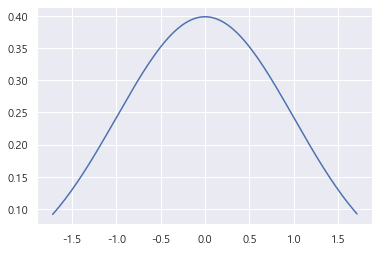

In [36]:
# 이상값 제거 후 표준정규분포 확인
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

## 3. 사분위수 범위로 이상값 삭제

In [38]:
# 이상값 데이터 생성
boxdata = pd.DataFrame(np.random.randn(100, 3), columns=["A열","B열","C열"])

In [40]:
boxdata.head()

,A열,B열,C열
0,1.566898,0.404523,-0.305362
1,0.192393,-1.051091,0.546531
2,-0.403509,-1.385797,0.614999
3,0.094556,1.706489,-0.353371
4,-0.528402,-0.946696,1.039188


In [42]:
# 2) 이상값 데이터 확인

# 기술 통계 정보로 pencentile 확인
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.260238,0.054474,0.109853
std,1.110019,0.923828,0.970407
min,-3.136785,-1.905964,-2.162443
25%,-1.082882,-0.543337,-0.493385
50%,-0.284700,0.037470,0.149072
75%,0.507484,0.665150,0.627117
max,2.650119,2.572544,2.476500


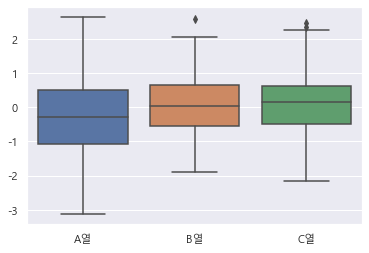

In [43]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [46]:
# 2) 이상값 확인

# 이상값 계산하는 함수
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=boxdata, column='B열', weight=1.5)

In [47]:
outlier_idx

Int64Index([83], dtype='int64')

In [48]:
# 이상값 삭제
boxdata.drop(outlier_idx, axis=0, inplace=True)

In [49]:
boxdata.shape

(99, 3)

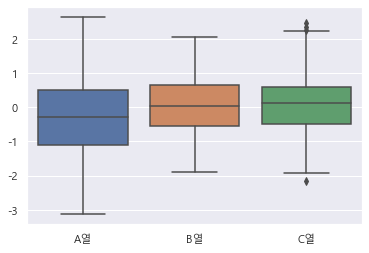

In [50]:
sns.boxplot(data = boxdata)
plt.show()

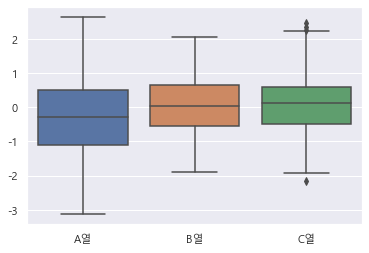

In [55]:
# 함수 사용해서 이상값 확인
outlier_idx = get_outlier(df=boxdata, column="A열", weight=1.5)

outlier_idx

# 이상값 각제
boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()